In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./../../Datasets/MNIST_Digit/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
start = 3000
end = 5000
data_X = df.values[start:end, 1:]
data_Y = df.values[start:end, 0]
print(data_X.shape, data_Y.shape, sep='\n')

(2000, 784)
(2000,)


In [45]:
scaler = StandardScaler()
stand_data_X = scaler.fit_transform(data_X)
print(stand_data_X.shape)

(2000, 784)


In [46]:
tsne = TSNE(n_components=2, random_state=0)

In [47]:
new_data_X = tsne.fit_transform(stand_data_X)
print(new_data_X.shape)

(2000, 2)


In [48]:
plot_data = np.vstack((new_data_X.T, data_Y)).T
plot_df = pd.DataFrame(plot_data, columns=('Dimension 1', 'Dimension 2', 'Label'))
plot_df.head()

,Dimension 1,Dimension 2,Label
0,-17.773289,-24.078363,7.0
1,-32.784424,-24.331711,4.0
2,-19.631504,-36.580505,9.0
3,7.653926,-15.341054,1.0
4,-40.210400,-3.287308,7.0


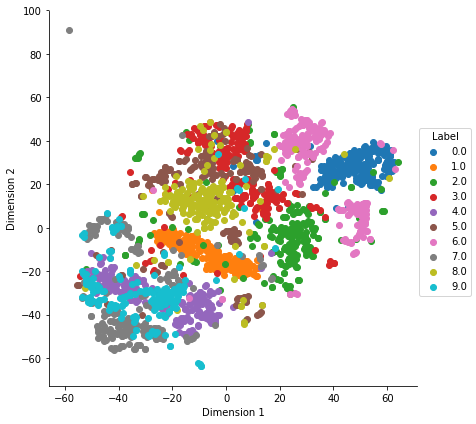

In [49]:
sn.FacetGrid(plot_df, hue='Label', size=6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.show()